In [1]:
                        ###########################################################
                        ## Machine Predictive Maintenance Classification Dataset ##
                        ###########################################################
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# check version number
import imblearn

In [48]:
# Leer .csv y creo un DF
df = pd.read_csv('Base_predictive_maintenance.csv', delimiter=",", index_col= ["UDI", "Product ID"])
df.head()

,,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,Product ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:




###############################################################   #
    ##                                                       ###  ##
  ####                                  ######################### ##
    ##                                  ## Analisis General ##### ###
    ##                                  ######################### ##
    ##                                                       ###  ##
    ##                                                       ##  #
  ######                                                     ## 
###############################################################  
# Datos del Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 781.2+ KB


In [4]:
# Estadistica
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
# Estadistica Transpuesta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [7]:
# Variable Target_1 desbalanceada
print(df["Target"].value_counts())

0    9661
1     339
Name: Target, dtype: int64


In [8]:
# Variable Target_2 desbalanceada
print(df["Failure Type"].value_counts())

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [49]:
# Clasificacion de variables por type data
    # Variable Failure Type es catergorica, pero TARGET SEGUN descripcion_Base1.txt .
categorical= []
int= []
float= []
for aux in df.columns:
  if df[aux].dtypes== 'object':
    categorical.append(aux)
  elif df[aux].dtypes== 'int64':
    int.append(aux)
  elif df[aux].dtypes== 'float64':
    float.append(aux)
print(categorical, int, float)


['Type', 'Failure Type'] ['Rotational speed [rpm]', 'Tool wear [min]', 'Target'] ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]']


In [66]:
#####################################################################################################################

                                    #############################
                                    ## Analisis de Categoricas ##
                                    #############################

#####################################################################################################################
#Distr de los datos, V. categoricas
for cat in  categorical:
    print(cat)
    print(df[cat].describe())
    print()

    

Type
count     10000
unique        3
top           L
freq       6000
Name: Type, dtype: object

Failure Type
count          10000
unique             6
top       No Failure
freq            9652
Name: Failure Type, dtype: object



C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


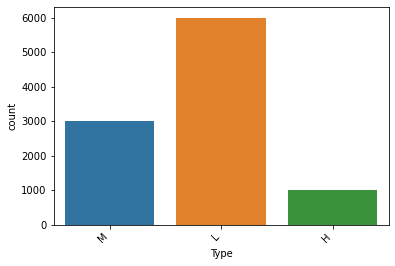

In [11]:
# Analisis Variable Type RECUENTO
draw = sns.countplot(df["Type"])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [51]:
                                        ##################################################
                                        ## Analisis de frecuencias variable categoricas ##
                                        ##################################################
# Frecuencia Variable Type
frec_df= pd.DataFrame(df["Type"].value_counts())
# Renombramos el value_count como frecuencia absoluta
frec_df.rename(columns={"Type":"Frec_abs"},inplace=True)
# Calculamos la frecuencia absoluta acumulada
frec_acum= []
aux_acum= 0
for i in (frec_df["Frec_abs"].values):
    aux_acum= aux_acum + i
    frec_acum.append(aux_acum)
frec_df["Frec_abs_acum"]= frec_acum
# Frecuencia Relativa en % 
frec_df["Frec_rel_%"]= 100 * frec_df["Frec_abs"]/len(df.Type)
# Valores de las Frecuencias relativas
frec_rel_val= frec_df["Frec_rel_%"].values
frec_rel_acum= []
aux_acum= 0
for i in frec_rel_val:
    aux_acum= aux_acum + i
    frec_rel_acum.append(aux_acum)
frec_df["Frec_rel_%_acum"]= frec_rel_acum
frec_df

,Frec_abs,Frec_abs_acum,Frec_rel_%,Frec_rel_%_acum
L,6000,6000,60.00,60.00
M,2997,8997,29.97,89.97
H,1003,10000,10.03,100.00


C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


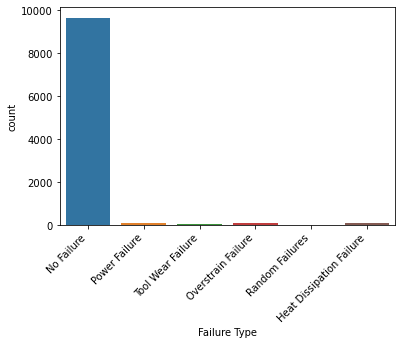

In [12]:
# Recuento de la variable Target_2
draw = sns.countplot(df["Failure Type"])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [54]:
df.groupby(['Product ID','Type'])['Failure Type'].value_counts()

Product ID  Type  Failure Type
H29424      H     No Failure      1
H29425      H     No Failure      1
H29432      H     No Failure      1
H29434      H     No Failure      1
H29441      H     No Failure      1
                                 ..
M24849      M     No Failure      1
M24851      M     No Failure      1
M24855      M     No Failure      1
M24857      M     No Failure      1
M24859      M     No Failure      1
Name: Failure Type, Length: 10000, dtype: int64

<AxesSubplot:xlabel='Type,Failure Type'>

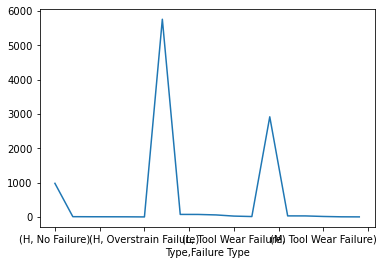

In [61]:
(df.groupby(['Type'])['Failure Type'].value_counts()).plot()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


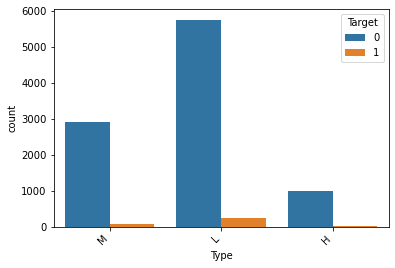

In [15]:
draw = sns.countplot(df["Type"], hue= df['Target'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

C:\Users\maxib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


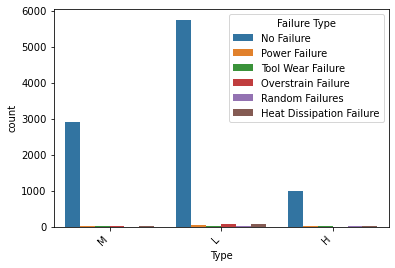

In [16]:
draw = sns.countplot(df["Type"], hue= df['Failure Type'])
draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
plt.show()

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

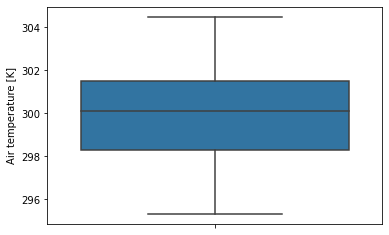

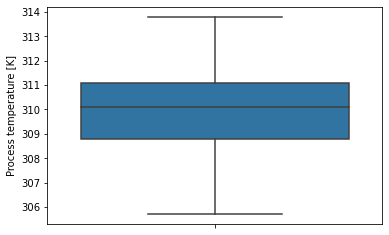

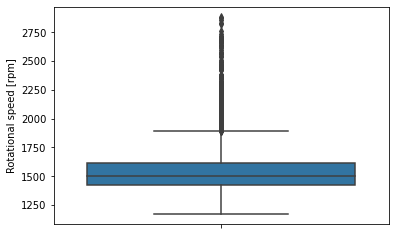

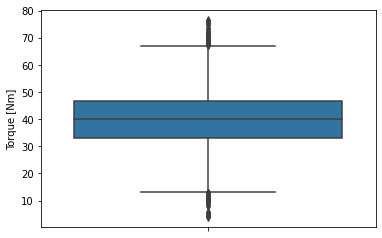

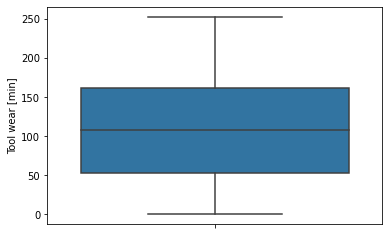

In [18]:
for aux in num:
  draw = sns.boxplot(y=df[aux], data=df, hue=df['Target'])
  draw.set_xticklabels(draw.get_xticklabels(), rotation=45, ha="right")
  plt.show()

Text(0.5, 1.05, 'Correlacion de Pearson variables numéricas')

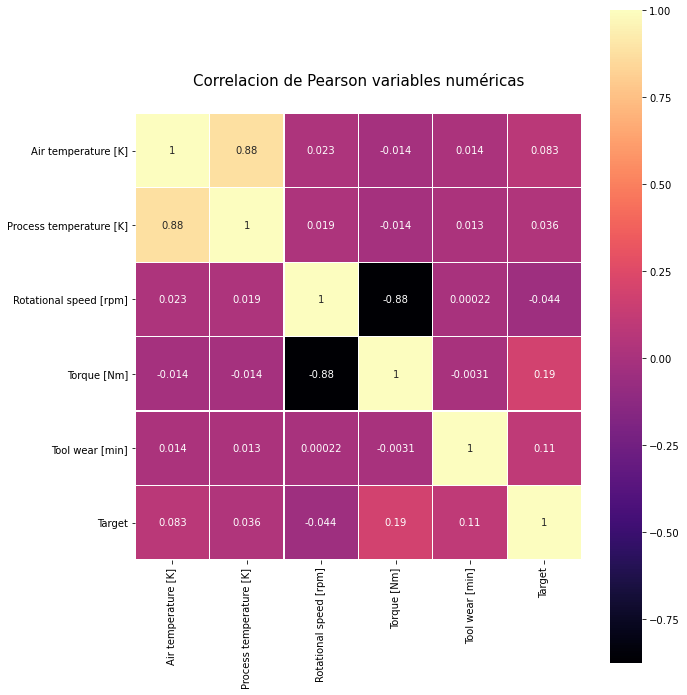

In [19]:
#Ploteamos un grafico de correlación
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="magma", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Correlacion de Pearson variables numéricas", y=1.05, size=15)

In [20]:
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
UDI,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


<AxesSubplot:ylabel='Count'>

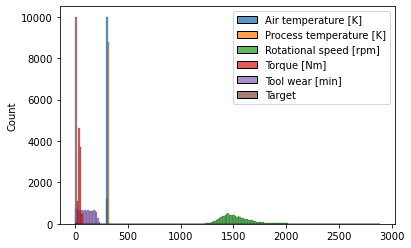

In [22]:
sns.histplot(df)

In [29]:
                                        ##################################################
                                        ## Analisis de frecuencias variable categoricas ##
                                        ##################################################
# Frecuencias de Columna TYPE
frec_df= pd.DataFrame(df["Type"].value_counts())
# Renombramos el value_count como frecuencia absoluta
frec_df.rename(columns={"Type":"Frec_abs"},inplace=True)